# Proj10

I certify that this project is my own work and is not the work of others. I agree not to share my solution with others. - Michael Navarro.

# Imports

In [1]:
import pandas as pd

# Stock Dataset

## Load Dataset

In [2]:
stocks = pd.read_csv('Stock01.csv')
stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


## Drop Unnecessary Data

In [3]:
# Drop columns
minimal_stocks = stocks.drop(['Open', 'Close', 'Volume', 'Name'], axis=1)
minimal_stocks.head()

,Date,High,Low
0,2006-01-03,41.22,38.79
1,2006-01-04,41.90,40.77
2,2006-01-05,41.73,40.85
3,2006-01-06,43.57,42.80
4,2006-01-09,43.66,42.82


In [4]:
# Drop rows outside of date range
minimal_stocks.Date = pd.to_datetime(minimal_stocks.Date, format = '%Y-%m-%d')
minimal_stocks = minimal_stocks[(minimal_stocks.Date <= '2007-03-20') & (minimal_stocks.Date >= '2006-01-06')]
minimal_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 3 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    301 non-null    datetime64[ns]
 1   High    301 non-null    float64       
 2   Low     301 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.4 KB


In [5]:
# Convert datetime object back to string
minimal_stocks['Date'] = minimal_stocks['Date'].dt.strftime('%Y-%m-%d')
minimal_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 3 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    301 non-null    object 
 1   High    301 non-null    float64
 2   Low     301 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB


## Format Dataframe

In [6]:
# Set index
minimal_stocks = minimal_stocks.set_index('Date')
minimal_stocks.head()

,High,Low
Date,,
2006-01-06,43.57,42.80
2006-01-09,43.66,42.82
2006-01-10,43.34,42.34
2006-01-11,42.31,41.72
2006-01-12,41.99,40.76


In [7]:
# Create differance coloumn
minimal_stocks['Differance'] = minimal_stocks['High'] - minimal_stocks['Low']
minimal_stocks.head()

,High,Low,Differance
Date,,,
2006-01-06,43.57,42.80,0.77
2006-01-09,43.66,42.82,0.84
2006-01-10,43.34,42.34,1.00
2006-01-11,42.31,41.72,0.59
2006-01-12,41.99,40.76,1.23


## Plot Data

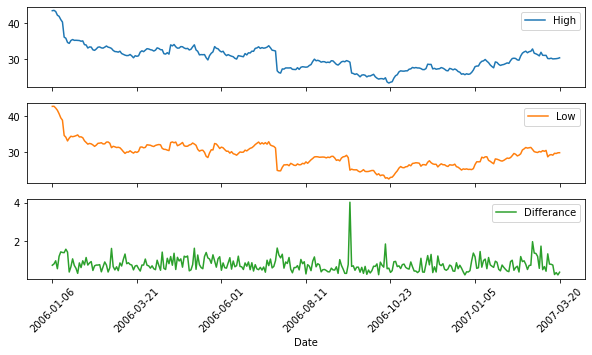

In [8]:
minimal_stocks.plot(subplots=True, figsize=(10,5), rot=45)
print()